In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas_datareader
import datetime
import pandas_datareader.data as web

%matplotlib inline

In [6]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2020,1,1)

In [7]:
tesla = web.DataReader('TSLA', 'yahoo', start,end)

In [9]:
tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,85.094002,82.538002,83.671997,85.050003,40273500,85.050003
2019-12-26,86.695999,85.269997,85.582001,86.188004,53169500,86.188004
2019-12-27,87.061996,85.222000,87.000000,86.075996,49728500,86.075996
2019-12-30,85.800003,81.851997,85.758003,82.940002,62932000,82.940002
2019-12-31,84.258003,80.416000,81.000000,83.666000,51428500,83.666000


In [10]:
ford = web.DataReader('F', 'yahoo', start, end)

In [11]:
ford.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,9.49,9.43,9.44,9.47,11881600.0,9.311640
2019-12-26,9.49,9.43,9.47,9.45,28961300.0,9.291973
2019-12-27,9.46,9.35,9.45,9.36,28272800.0,9.203478
2019-12-30,9.35,9.23,9.34,9.25,36074900.0,9.095318
2019-12-31,9.33,9.25,9.25,9.30,32342100.0,9.144482


In [12]:
genmot = web.DataReader('GM', 'yahoo', start, end)

In [13]:
genmot.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,36.740002,36.500000,36.730000,36.580002,2924200.0,36.139141
2019-12-26,36.599998,36.330002,36.590000,36.480000,5439700.0,36.040344
2019-12-27,36.709999,36.430000,36.560001,36.560001,5753500.0,36.119381
2019-12-30,36.639999,36.200001,36.500000,36.439999,5353900.0,36.000824
2019-12-31,36.740002,36.320000,36.369999,36.599998,5160200.0,36.158894


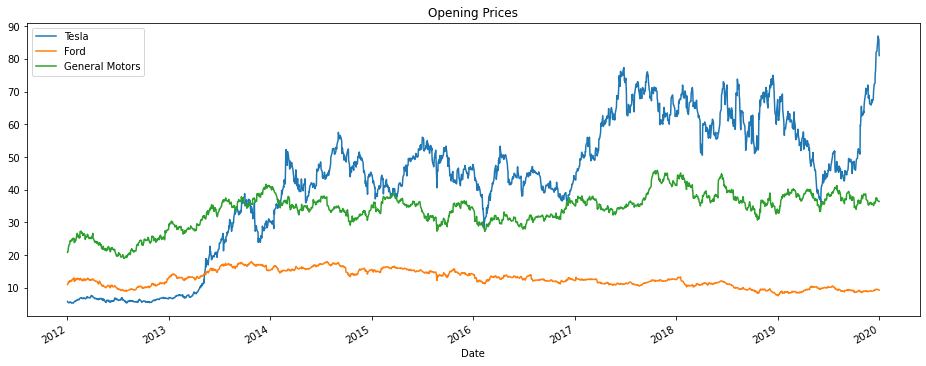

In [18]:
tesla['Open'].plot(label='Tesla',figsize=(16,6), title ='Opening Prices')
ford['Open'].plot(label='Ford')
genmot['Open'].plot(label='General Motors')
plt.legend();

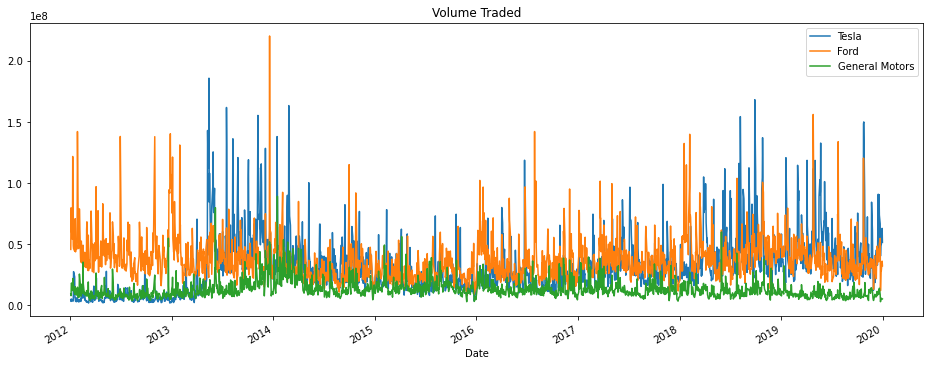

In [19]:
tesla['Volume'].plot(label='Tesla',figsize=(16,6), title ='Volume Traded')
ford['Volume'].plot(label='Ford')
genmot['Volume'].plot(label='General Motors')
plt.legend();

In [24]:
ford['Volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

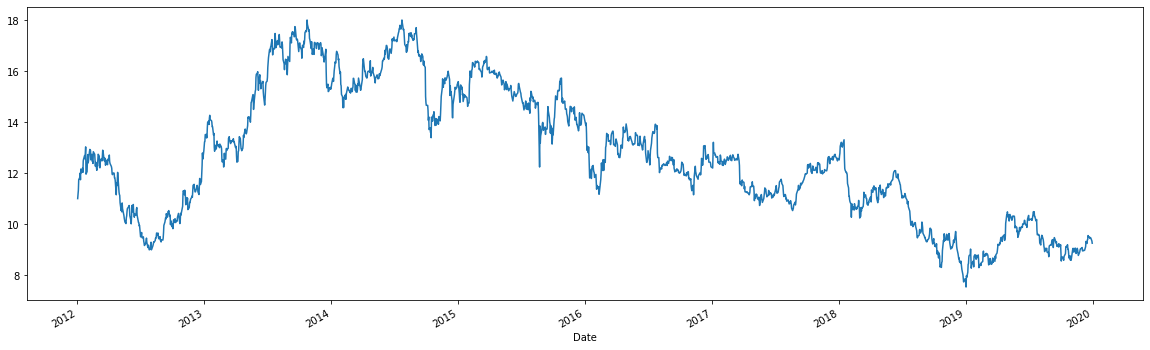

In [25]:
ford['Open'].plot(figsize=(20,6))

In [26]:
# Kind of Total Traded

In [27]:
tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']
genmot['Total Traded'] = genmot['Open'] * genmot['Volume']

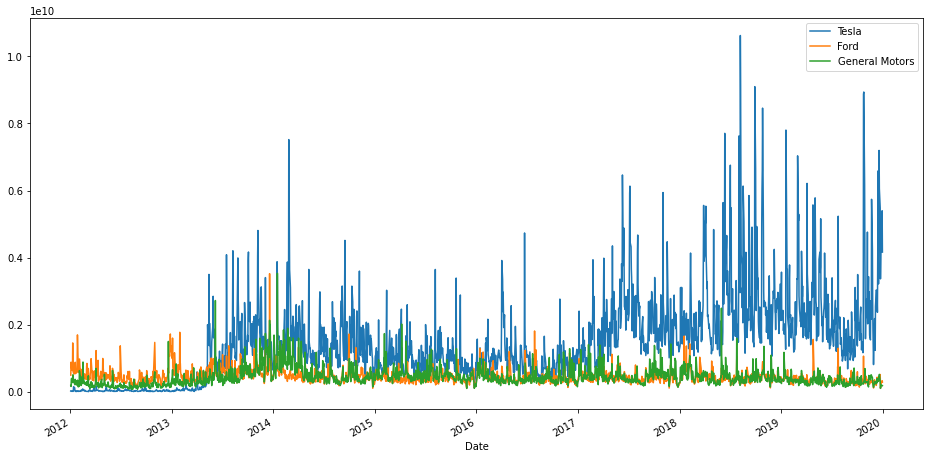

In [29]:
tesla['Total Traded'].plot(label='Tesla', figsize=(16,8))
ford['Total Traded'].plot(label='Ford')
genmot['Total Traded'].plot(label='General Motors')
plt.legend();

In [31]:
tesla['Total Traded'].idxmax()

Timestamp('2018-08-07 00:00:00')

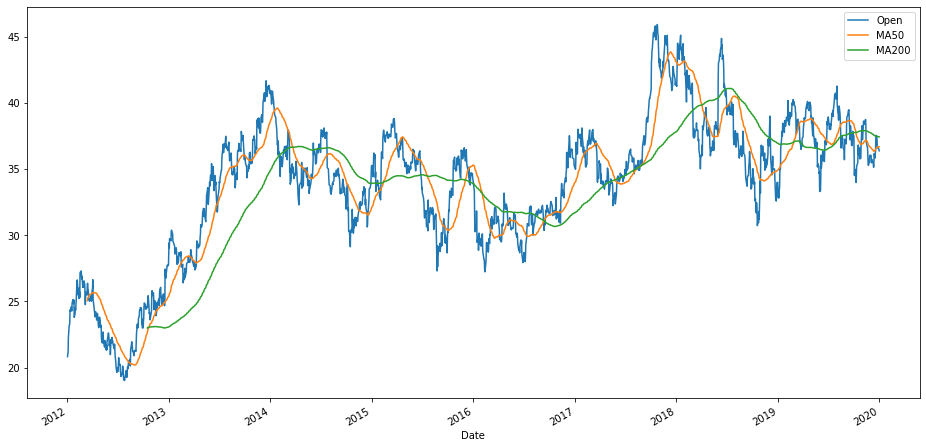

In [34]:
# 50 and 200 days Moving Average

genmot['MA50'] = genmot['Open'].rolling(50).mean()
genmot['MA200'] = genmot['Open'].rolling(200).mean()
genmot[['Open', 'MA50', 'MA200']].plot(figsize=(16,8))
plt.legend();

In [35]:
from pandas.plotting import scatter_matrix

In [36]:
car_comp = pd.concat([tesla['Open'], genmot['Open'], ford['Open']], axis=1)

In [38]:
car_comp.columns = ['Tesla Open', 'GM Open', 'Ford Open']
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,5.788,20.830000,11.00
2012-01-04,5.642,21.049999,11.15
2012-01-05,5.552,21.100000,11.33
2012-01-06,5.440,22.260000,11.74
2012-01-09,5.400,23.200001,11.83


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F63317C7C0>,
      dtype=object)

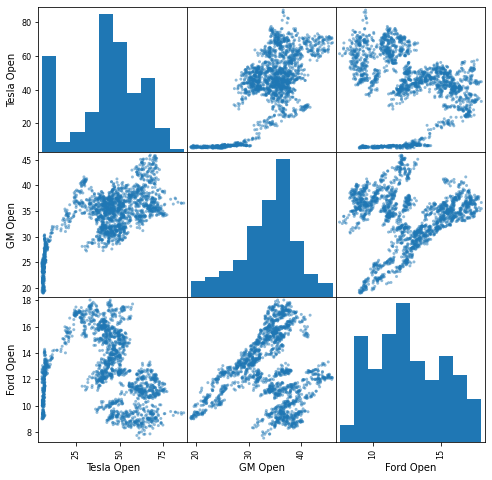

In [39]:
scatter_matrix(car_comp, figsize=(8,8))

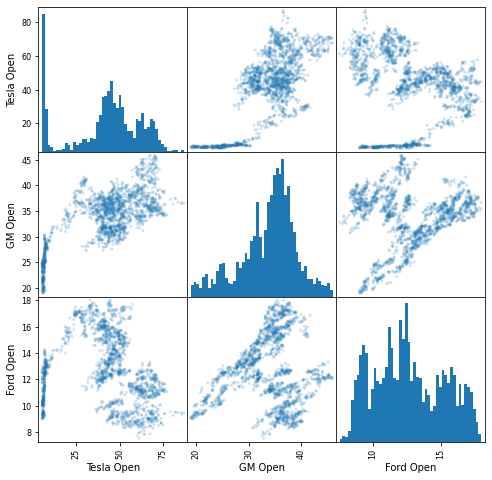

In [41]:
scatter_matrix(car_comp, figsize=(8,8), alpha=0.2, hist_kwds={'bins':50});